# Color Schemes

array([0.1       , 0.18888889, 0.27777778, 0.36666667, 0.45555556,
       0.54444444, 0.63333333, 0.72222222, 0.81111111, 0.9       ])

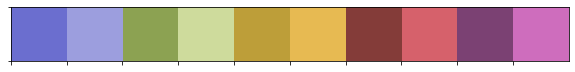

In [41]:
exn_cols = (np.linspace(0.1,0.9,10))
sns.color_palette(plt.cm.tab20b(exn_cols))#.as_hex()


# sns.palplot(['#370042','#600073',"#980070","#c60065","#e92a55","#ff5a40","#ff8827","#ffb600","#ffe300","#fff89c"])

sns.color_palette(['#370042','#600073',"#980070","#c60065","#e92a55","#ff5a40","#ff8827","#ffb600","#ffe300","#fff89c"])
sns.palplot(plt.cm.tab20b(exn_cols))

exn_cols



In [ ]:
np.linspace(0.1,0.9,10)

['#6b6ecf',
 '#9c9ede',
 '#8ca252',
 '#cedb9c',
 '#bd9e39',
 '#e7ba52',
 '#843c39',
 '#d6616b',
 '#7b4173',
 '#ce6dbd']

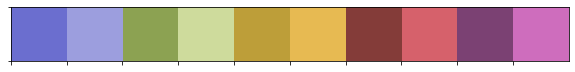

In [4]:
# Set up color Pallette for plotting
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

    
# For plotting:
%matplotlib inline



custom_colors = plt.cm.tab20b(np.linspace(0.1,0.9,10))

# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(custom_colors))
# convert seaborn color schemes to matplotlib colormaps
# color_map = ListedColormap(color_scheme.as_hex()) 
# Show color Pallete
sns.palplot(custom_colors)

red_theme = "#3498db"
blue_theme = "#eba044"

# print("theme_1 color:")
# sns.palplot(red_theme)

# print("theme_2 color:")
# sns.palplot(blue_theme)


sns.color_palette(custom_colors).as_hex()

# https://learnui.design/tools/data-color-picker.html


# Various Plot Types
## Bar
## Box and Whisker
## Scatter Plot
## Histogram
## Alignment Diagram
## Weight Matrix
# Image File Types (vector)


# Gene Diagram

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib



class GeneImage(object):
    def __init__(self, exon_intervals, marker_pos=[], marker_heights=[], marker_colors=[],
                 marker_size=200, marker_weight=1.5, exon_color="black", intron_color="black",
                 intron_weight=0, intron_style='-', bar_color='black', bg_color="white"):
        self.exonIntervals = exon_intervals
        self.markerPositions = marker_pos
        self.markerHeights = marker_heights
        self.markerColors = marker_colors
        self.markerSize = marker_size
        self.MarkerWeight = marker_weight
        self.exonColor = exon_color
        self.intronColor = intron_color
        self.intronWeight = intron_weight
        self.intronStyle = intron_style
        self.barColor= bar_color
        self.bgColor = bg_color
        self.markerDefaultColor = 'grey'
        self.numExons = len(self.exonIntervals)
        self.totalSpan = 31976
        self.minExonLen = self.totalSpan*0.005
        self.ylims = {'exon_max': 2, 'exon_min':1}
        self.figure, self.canvas = plt.subplots(figsize=(30,5)) # TODO: change to larger number
        self.canvas.set_facecolor(self.bgColor)
        self._draw()

    def _set_limits(self):
        self.ylims['intron_max'] = self.ylims['exon_max']*0.9
        self.ylims['intron_min'] = (self.ylims['exon_max'] + self.ylims['exon_min'])/2.0
        self.ylims['bar_min'] = self.ylims['exon_max']-0.6#+0.2
        self.ylims['bar_max'] = self.ylims['bar_min']+(self.ylims['exon_max']-self.ylims['exon_min'])/5.0
        
    
    def _transform_spans(self):
        span_lens = [x[1]-x[0] for x in self.exonIntervals]
        max_len = float(max(span_lens))
        transformed_intervals = []
        if max_len < self.minExonLen:
            span_ratios = [x/max_len for x in span_lens]
            expansion_factor = self.totalSpan*1e-11
            for i in range(1,10):
                ef = (2**i)*expansion_factor
                if max_len+ef > self.minExonLen:
                    expansion_factor = ef
                    break
            for i,j in zip(self.exonIntervals, span_ratios):
                mid = (i[0] + i[1])/2
                f = (expansion_factor*j)/2
                if mid+f - mid-f > self.minExonLen:
                    transformed_intervals.append([mid-f, mid+f])
                else:
                    transformed_intervals.append([mid-(self.minExonLen/2), mid+(self.minExonLen/2)])
        else:
            for i in range(self.numExons):
                if span_lens[i] < self.minExonLen:
                    mid = (self.exonIntervals[i][0] + self.exonIntervals[i][0])/2 
                    transformed_intervals.append([mid-(self.minExonLen/2), mid+(self.minExonLen/2)])
                else:
                    transformed_intervals.append(self.exonIntervals[i])
        self.exonIntervals = transformed_intervals[:]
        
    def _draw_exon(self, span,col):
        self.canvas.fill_between(span, self.ylims['exon_min']+.2, self.ylims['exon_max']-.2,
                                 edgecolor=self.bgColor, facecolor=col)#self.exonColor)
        return True
    
    def _draw_first_exon(self, span,col):
        self.canvas.fill_between(span, self.ylims['exon_min']-.1+.2, self.ylims['exon_max']-.1-.2,
                                 edgecolor=self.bgColor, facecolor=col)#self.exonColor)
        return True
        
    def _draw_intron(self, span):
        mid = (span[0]+span[1])/2.0
        self.canvas.plot([span[0], mid], [self.ylims['intron_min'], self.ylims['intron_max']],
                         c=self.intronColor, lw=self.intronWeight, ls=self.intronStyle)
        self.canvas.plot([mid, span[1]], [self.ylims['intron_max'], self.ylims['intron_min']],
                         c=self.intronColor, lw=self.intronWeight, ls=self.intronStyle)
        return True
    
    def _draw_markers(self):
        if self.markerHeights == []:
            self.markerHeights = [self.ylims['exon_max']-self.ylims['exon_min'] for x in self.markerPositions]
        if self.markerColors == []:
            self.markerColors = [self.markerDefaultColor for x in self.markerPositions] 
        norm = matplotlib.colors.Normalize(-1,1)
        grad_colrs = [[norm(-1.0), "white"],[norm( 1.0), "#00bfc9"]]
        cmp1 = matplotlib.colors.LinearSegmentedColormap.from_list("", grad_colrs)
#         for p,h,c,m in zip(self.markerPositions, self.markerHeights, self.markerColors,num_missing):
#             self.canvas.plot((p, p), (self.ylims['bar_max'], self.ylims['bar_max']+h),
#                              linestyle='', color='black', linewidth=self.MarkerWeight, alpha=0.7)
        self.canvas.scatter(self.markerPositions, [x+0.82 for x in self.markerHeights], 
#                 c =  [20, 18, 17, 20, 12, 11, 23, 37, 13, 26, 14, 11, 23, 12, 13, 24, 12, 16, 13, 49, 14, 15, 9, 15, 13, 18, 17, 20, 16, 77, 16, 21, 16, 7, 14, 15, 17, 31, 30, 31, 17, 32, 31, 31, 13, 34, 36, 18, 8, 11, 9, 8, 8, 14, 24, 7, 13, 9, 14, 12, 13, 36, 100, 13, 18, 13, 15, 94, 14, 13, 41, 14, 48, 41, 47, 46, 46, 43, 36, 41, 6, 43, 43, 40, 16, 21, 21, 13, 21, 169, 20, 13, 22, 169, 17, 19, 14, 11, 14, 20, 19, 31, 12, 21, 17, 6, 21, 25],
                c = [3,3,4,3,16,64,42,35,59,14,4,64,78,5,42,4,38,68,58,19,43,67,68,69,24,6,60,70,40,7,17,25,8,5,66,54,9,63,10,9,38,47,49,10,28,15,34,9,12,11,12,24,64,100,34,13,63,63,49,51,47,77,64,66,51,50,31,9,55,15,11,10,34,10,34,12,11,56,37,21,11,53,84,14,13,12,87,10,15,10,12,9,9,12,13,22,42,67,10,10,29,30,5,4,13,15,22,0],

                s=self.markerSize, marker='v', cmap=cmp1,
                linewidths=1,edgecolors='black', alpha=1)
#             self.canvas.scatter(p, self.ylims['bar_max']+0.23, s=self.markerSize, marker='v', c=
#                                 cmap=cmp1,linewidths=1.5,edgecolors='black', alpha=1)       
    
    def _clean_axes(self):
        #self.canvas.set_ylim((self.ylims['exon_min'], self.ylims['bar_max']))
        self.canvas.set_yticks([], [])
        self.canvas.get_xaxis().tick_top()
        self.canvas.tick_params(axis='x', direction='out')
        self.canvas.set_xticks([])
        for o in ["top", "bottom", "left", "right"]:
            self.canvas.spines[o].set_visible(False)
        min_pos = 0#int(self.exonIntervals[0][0] - self.totalSpan * 0.1)
        if min_pos < 0:
            min_pos = 0
        max_pos = 31976#int(self.exonIntervals[-1][1] + self.totalSpan * 0.1)
        minortick_pos = [int(x) for x in range(0, 31976, int((0-31976)/20))][1:]
        
    def _draw(self):
        self._set_limits()
        self._transform_spans()#['maroon','orange','pink','Purple','magenta','Blue','Green','red',"lime"]
        
        # colors
        exn_cols = ['#370042','#600073',"#980070","#c60065","#e92a55","#ff5a40","#ff8827","#ffb600","#ffe300","#fff89c"]
#         exn_cols = plt.cm.tab20b(np.linspace(0.1,0.9,10))

        self.canvas.fill_between([0,self.totalSpan ],
                                  self.ylims['bar_min'], self.ylims['bar_max'],
                                  edgecolor=self.bgColor, facecolor=self.barColor)

        for i in range(self.numExons):
            if i > 0:
                self._draw_intron([self.exonIntervals[i-1][1], self.exonIntervals[i][0]])
            if i==1:
                self._draw_first_exon(self.exonIntervals[i],exn_cols[i])
            else:
                self._draw_exon(self.exonIntervals[i],exn_cols[i])
        
        self._draw_markers()
        self._clean_axes()
    
    def show(self):
        plt.show()
    def save(self,file_name):
        plt.savefig(file_name+".eps", format='eps',transparent=True)
        print("File saved to: ",file_name+".eps" )
        



        




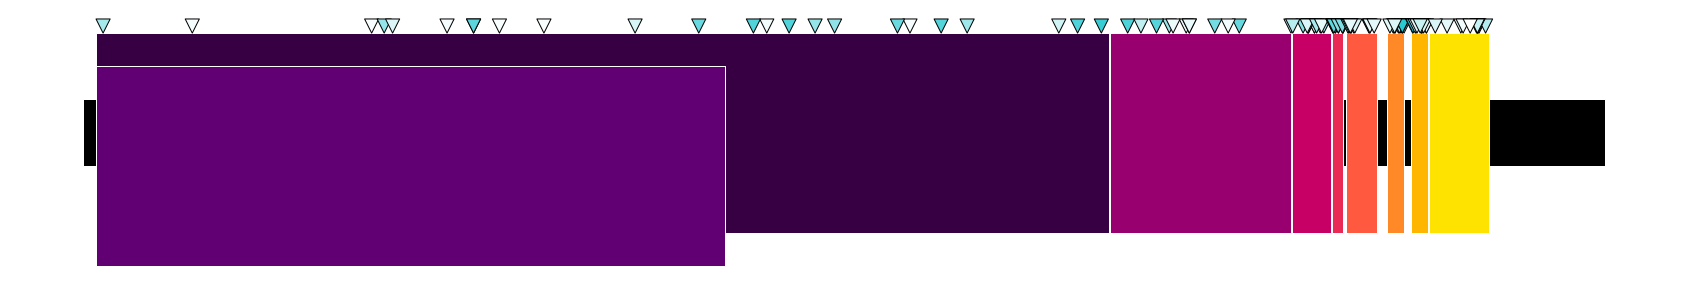

In [40]:
# exon positions
exon_pos=[266, 21555],[266, 13483], [21563, 25384], [25393, 26220], [26245, 26472], [26523, 27191], [27394, 27759], [27894, 28259], [28274, 29533]

# Patient isolate homology:
# homology_list =  [20, 18, 17, 20, 12, 11, 23, 37, 13, 26, 14, 11, 23, 12, 13, 24, 12, 16, 13, 49, 14, 15, 9, 15, 13, 18, 17, 20, 16, 77, 16, 21, 16, 7, 14, 15, 17, 31, 30, 31, 17, 32, 31, 31, 13, 34, 36, 18, 8, 11, 9, 8, 8, 14, 24, 7, 13, 9, 14, 12, 13, 36, 100, 13, 18, 13, 15, 94, 14, 13, 41, 14, 48, 41, 47, 46, 46, 43, 36, 41, 6, 43, 43, 40, 16, 21, 21, 13, 21, 169, 20, 13, 22, 169, 17, 19, 14, 11, 14, 20, 19, 31, 12, 21, 17, 6, 21, 25]

# CoV family homology:
# homology_list = [3,3,4,3,16,64,42,35,59,14,4,64,78,5,42,4,38,68,58,19,43,67,68,69,24,6,60,70,40,7,17,25,8,5,66,54,9,63,10,9,38,47,49,10,28,15,34,9,12,11,12,24,64,100,34,13,63,63,49,51,47,77,64,66,51,50,31,9,55,15,11,10,34,10,34,12,11,56,37,21,11,53,84,14,13,12,87,10,15,10,12,9,9,12,13,22,42,67,10,10,29,30,5,4,13,15,22,0
# NOTE: NEED TO UPDATE c IN CODE ABOVE TO CHANGE HOMOLOGY COLORS IN ARROWS!!

# marker positions
marker_pos = [8744,6059,2290,9679,11594,8201,6322,416,12932,6499,7643,8200,21391,14361,15376,17370,18571,14830,17107,20497,15786,18025,14080,20892,25375,23174,24289,21944,22820,22898,23239,22223,23240,24056,22550,23774,25992,25734,25870,25868,26066,25630,25745,25736,25413,25717,25914,26018,26463,26374,26467,26261,26258,26470,26313,26269,26305,26277,26369,26455,26581,27014,27032,26638,26573,26637,26602,27035,26693,26717,27123,26624,27751,27537,27522,27705,27671,27633,27656,27565,27455,27720,27715,27553,28119,27932,27940,28218,28002,28128,27986,28222,28024,28127,28163,28091,29328,29307,28945,28655,29276,29464,28992,29293,29303,28407,29292,29141]
total_span = 31976
gene = GeneImage(exon_pos, marker_pos)


# gene.show()
# save
# gene.save("covid_genome_arrows_colored_by_genome_presence")
# gene.save("covid_genome_arrows_colored_by_genome_presence_CoV_family")